In [ ]:
#Scraping Sale section from Sakneen.com

from datetime import datetime
import json
import requests
import io
response = requests.post('https://app.sakneen.com/apis/marketplace/filters/v2?limit=30&page=1')
x = json.loads(response.text)
pages = x['numberOfPages']
rows=[]
for i in range(1, pages+1):
    response = requests.post('https://app.sakneen.com/apis/marketplace/filters/v2?limit=30&page=' + str(i))
    x = json.loads(response.text)
    rows+=x['data']

dt = datetime.now()
dt = dt.strftime('%Y-%m-%d@%H.%M.%S')
with io.open('Sakneen_Sale_' + str(dt) + '.json', encoding='utf-8', mode = "w") as f:
    f.write("[\n")
    i = 1
    for row in rows:
        x = json.dumps(row, ensure_ascii=False)
        if i != len(rows):
            f.write("\t" + x + ",\n")
        else:
            f.write("\t" + x + "\n")
        i+=1
    f.write("]")
#print(len(rows), 'scraped lisitngs.')

In [4]:
# Loading liberaries and our dataset
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

df = pd.read_csv(r"Sakneen.csv", encoding="utf-8-sig")


In [22]:
# Logistic Regression Model
le = LabelEncoder()
df['finishingType'] = le.fit_transform(df['finishingType'])
df['unitType'] = le.fit_transform(df['unitType'])
df['city.nameEnglish'] = le.fit_transform(df['city.nameEnglish'])
df['district.nameEnglish'] = le.fit_transform(df['district.nameEnglish'])

y=df['totalPrice']
features = ['bua', 'IsCompound', 'bedrooms',
'bathrooms', 'land', 
'city.nameEnglish',  'finishingType', 'unitType']
X=df[features]

s = StandardScaler()
X = s.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y)

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X)
y_prob = lr.predict_proba(X)

df['Calculated Price'] = y_pred

# Save results
df.to_csv(r'result.csv', encoding="utf-8-sig")

# Model exact accuracy
from sklearn.metrics import accuracy_score  
yyy = lr.predict(X)  
accuracy = accuracy_score(y,yyy)*100  
print ("Model accuracy")  
print(accuracy)

Model accuracy
10.2


C:\Users\youss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


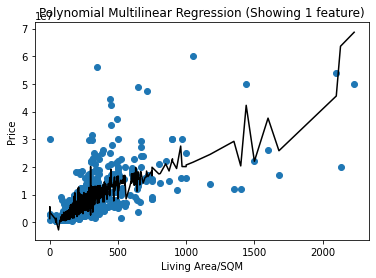

In [34]:

# Polynomial Model

df = pd.read_csv(r"Sakneen.csv", encoding="utf-8-sig")

le = LabelEncoder()
df['finishingType'] = le.fit_transform(df['finishingType'])
df['unitType'] = le.fit_transform(df['unitType'])
df['city.nameEnglish'] = le.fit_transform(df['city.nameEnglish'])
df['district.nameEnglish'] = le.fit_transform(df['district.nameEnglish'])

features = ['bua', 'IsCompound', 'bedrooms',
'bathrooms', 'land', 'garage',
'city.nameEnglish', 'district.nameEnglish', 'finishingType', 'unitType']


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

df.sort_values("bua", inplace=True)
train_df.sort_values("bua", inplace=True)
test_df.sort_values("bua", inplace=True)

x_linear_regression = df["bua"].values.reshape(-1,1)
x_linear_regression_training = train_df["bua"].values.reshape(-1,1)
x_linear_regression_testing = test_df["bua"].values.reshape(-1,1)

x_multilinear_regression = df[ ["bua", "bedrooms", "IsCompound"] ]
x_multilinear_regression_training = train_df[ ["bua", "bedrooms", "IsCompound"] ].values
x_multilinear_regression_testing = test_df[ ["bua", "bedrooms", "IsCompound"] ].values

poly_multi_columns = [ "bua", "bedrooms", "IsCompound", "bathrooms", "unitType" ]
poly = PolynomialFeatures(degree = 2) 
x_polynomial = df[ poly_multi_columns ]
x_polynomial = poly.fit_transform(x_polynomial)
x_polynomial_multi_training = train_df[ poly_multi_columns ].values
x_polynomial_multi_testing = test_df[ poly_multi_columns ].values
x_polynomial_multi_training = poly.fit_transform(x_polynomial_multi_training)
x_polynomial_multi_testing = poly.fit_transform(x_polynomial_multi_testing)

y = df["totalPrice"].values.reshape(-1, 1)
y_training = train_df["totalPrice"].values.reshape(-1, 1)
y_testing = test_df["totalPrice"].values.reshape(-1, 1)

model_poly=LinearRegression()   #build polynomial multi regression model
model_poly.fit(x_polynomial_multi_training,y_training)  #fitting the training data
predicted_poly=model_poly.predict(x_polynomial_multi_testing) #testing our model’s performance

plt.scatter(x_linear_regression, y)
plt.title("Polynomial Multilinear Regression (Showing 1 feature)")
plt.ylabel("Price")
plt.xlabel("Living Area/SQM")
plt.plot(x_linear_regression,model_poly.predict(x_polynomial),color="k")
plt.show()